In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
user = pd.read_csv("takehome_users.csv", encoding='latin-1')

In [3]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
user_sum = pd.read_csv("takehome_user_engagement.csv")

In [6]:
user_sum.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [7]:
user_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
#Convert time_stamp column dtype from object to datetime
user_sum.time_stamp = pd.to_datetime(user_sum.time_stamp)
user_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [9]:
#Set datetime as index
temp_user_sum = user_sum
temp_user_sum.set_index('time_stamp', inplace=True)
temp_user_sum

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [10]:
#Sort the index by time
temp_user_sum = temp_user_sum.sort_index()
temp_user_sum

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1
...,...,...
2014-06-04 23:32:13,4625,1
2014-06-04 23:34:04,9325,1
2014-06-04 23:46:31,9558,1


In [11]:
#Group by used_id and by a timeframe of 7 days
temp_user_sum = temp_user_sum.groupby('user_id')['visited'].rolling('7D').sum()
temp_user_sum

user_id  time_stamp         
1        2014-04-22 03:53:30    1.0
2        2013-11-15 03:45:04    1.0
         2013-11-29 03:45:04    1.0
         2013-12-09 03:45:04    1.0
         2013-12-25 03:45:04    1.0
                               ... 
11996    2013-09-06 06:14:15    1.0
11997    2013-01-15 18:28:37    1.0
11998    2014-04-27 12:45:16    1.0
11999    2012-06-02 11:55:59    1.0
12000    2014-01-26 08:57:12    1.0
Name: visited, Length: 207917, dtype: float64

In [12]:
temp_user_sum = pd.DataFrame(temp_user_sum)
temp_user_sum

visited
user_id time_stamp                  
1       2014-04-22 03:53:30      1.0
2       2013-11-15 03:45:04      1.0
        2013-11-29 03:45:04      1.0
        2013-12-09 03:45:04      1.0
        2013-12-25 03:45:04      1.0
...                              ...
11996   2013-09-06 06:14:15      1.0
11997   2013-01-15 18:28:37      1.0
11998   2014-04-27 12:45:16      1.0
11999   2012-06-02 11:55:59      1.0
12000   2014-01-26 08:57:12      1.0

[207917 rows x 1 columns]

In [13]:
temp_user_sum.reset_index(inplace=True)
temp_user_sum

,user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,1.0
2,2,2013-11-29 03:45:04,1.0
3,2,2013-12-09 03:45:04,1.0
4,2,2013-12-25 03:45:04,1.0
...,...,...,...
207912,11996,2013-09-06 06:14:15,1.0
207913,11997,2013-01-15 18:28:37,1.0
207914,11998,2014-04-27 12:45:16,1.0
207915,11999,2012-06-02 11:55:59,1.0


In [14]:
#Group by user_id, and aggregate by the max of visited
temp_user_sum = temp_user_sum.groupby('user_id').max()
temp_user_sum

,time_stamp,visited
user_id,,
1,2014-04-22 03:53:30,1.0
2,2014-03-31 03:45:04,3.0
3,2013-03-19 23:14:52,1.0
4,2013-05-22 08:09:28,1.0
5,2013-01-22 10:14:20,1.0
...,...,...
11996,2013-09-06 06:14:15,1.0
11997,2013-01-15 18:28:37,1.0
11998,2014-04-27 12:45:16,1.0


In [15]:
#Label whether users are considered to be adopted based on given criteria
temp_user_sum['adoption_status'] = np.where(temp_user_sum.visited >= 3, 'Adopted', 'Not Adopted')
temp_user_sum

,time_stamp,visited,adoption_status
user_id,,,
1,2014-04-22 03:53:30,1.0,Not Adopted
2,2014-03-31 03:45:04,3.0,Adopted
3,2013-03-19 23:14:52,1.0,Not Adopted
4,2013-05-22 08:09:28,1.0,Not Adopted
5,2013-01-22 10:14:20,1.0,Not Adopted
...,...,...,...
11996,2013-09-06 06:14:15,1.0,Not Adopted
11997,2013-01-15 18:28:37,1.0,Not Adopted
11998,2014-04-27 12:45:16,1.0,Not Adopted


In [16]:
#Merge adoption_status column to the user dataframe 
user = user.merge(temp_user_sum.adoption_status, how='left', right_index=True, left_on='object_id')
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adoption_status
0,1,2014-04-22 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Not Adopted
1,2,2013-11-15 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Adopted
2,3,2013-03-19 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Not Adopted
3,4,2013-05-21 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Not Adopted
4,5,2013-01-17 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Not Adopted


In [17]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adoption_status             8823 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


In [18]:
user.adoption_status.value_counts()

Not Adopted    7221
Adopted        1602
Name: adoption_status, dtype: int64

In [19]:
temp_user_sum.adoption_status.value_counts()

Not Adopted    7221
Adopted        1602
Name: adoption_status, dtype: int64

In [20]:
#Fill in the null values of the adoption_status column
user.adoption_status.fillna('Never Visited', inplace=True)
user.adoption_status.value_counts()

Not Adopted      7221
Never Visited    3177
Adopted          1602
Name: adoption_status, dtype: int64

In [21]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adoption_status             12000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


<AxesSubplot:xlabel='adoption_status', ylabel='count'>

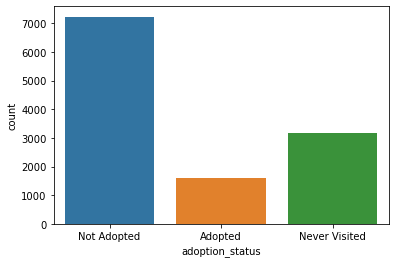

In [22]:
import seaborn as sns

sns.countplot(x='adoption_status', data=user)

In [23]:
#Add an additional binary feature regarding if a user was invited by another user or not 
user['invited'] = np.where(user.invited_by_user_id >= 0, 1, 0)
user.invited.value_counts()

1    6417
0    5583
Name: invited, dtype: int64

In [25]:
#Train a random forest classification model for predicting future user adoption
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
 
X = user[['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited']]
y = user.adoption_status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [26]:
#Use a random forest classifier to fit and predict the data

rf = RandomForestClassifier(random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Text(0.5, 1.0, 'Random Forest Classifier: Feature Importances')

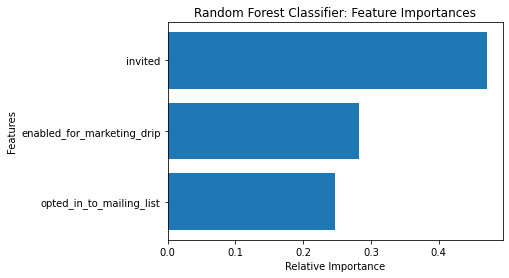

In [27]:
#Rank the features to determine which is the most important in predicting future user adoption
feature_rank = pd.DataFrame(list(zip(X, rf.feature_importances_)), columns=['feature', 'score'])
feature_rank = feature_rank.sort_values(by='score')

plt.figure()
plt.barh(feature_rank.feature, feature_rank.score)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier: Feature Importances')

**Conclusion**

As we can see, based on the results of the random forest classifier model, the best feature in predicting future user adoption is based on if users have been invited by another user, followed by if they are on the regular marketing drip, and then by if they are opted into receiving marketing emails.